#### Final Project

#### Miles A. Peña

#### DSC 530

#### 03/02/2023

In [2]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import scipy.stats
import numpy as np

#### The aim of this project is to determine the relationship (if any) that exists between time and threat levels of extinction as well as the impact (if any) that the endangerment of one species has on another. 

In [105]:
# import Figure 22 which according to the User Guide Entity Attributes is Comma-delimited ASCII text file containing the cumulative number of species listed as threatened or endangered (accounting for delistings) under the Endangered Species Act, from 1 July 1976 through 27 October 2010 for all taxa, plants, animals, vertebrate groups (amphibians, birds, fish, mammals, reptiles), and invertebrate groups (arachnids, crustaceans, insects, and molluscs).

endangered_df = pd.read_csv("RDS-2014-0009/Data/Figure_22.csv",
                                    parse_dates=['date'],
                                    index_col=['date'])

/var/folders/s8/kflkrk3j0vv8sqc2gd5wntvm0000gn/T/ipykernel_20815/2298242140.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  endangered_df = pd.read_csv("RDS-2014-0009/Data/Figure_22.csv",


In [106]:
endangered_df.head()

,all_m,all_b,all_r,all_am,all_f,all_s,all_cl,all_cr,all_i,all_ar,...,end_cr,thrt_cr,end_i,thrt_i,end_ar,thrt_ar,end_p,thrt_p,end_all,thrt_all
date,,,,,,,,,,,,,,,,,,,,,
1976-07-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-09-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-10-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-11-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-12-31,37,67,9,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,172,9


#### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

#### The variables that I selected are "all_all", "all_m", "all_b", "all_r", "all_am", "all_f", and "all_p". 

#### Describe what the 5 variables mean in the dataset (Chapter 1).

#### The "all_all" variable holds the number of all species listed as threatened or endangered. The "all_m" variable holds the number of mammals listed as threatened or endangered. The "all_b" variable holds the number of birds listed as threatened or endangered. The "all_r" variable holds the number of reptiles listed as threatened or endangered. The "all_am" variable holds the number of amphibians listed as threatened or endangered. The "all_f" variable holds the number of fish listed as threatened or endangered. The "all_p" variable holds the number of plants listed as threatened or endangered.

#### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

#### All Species

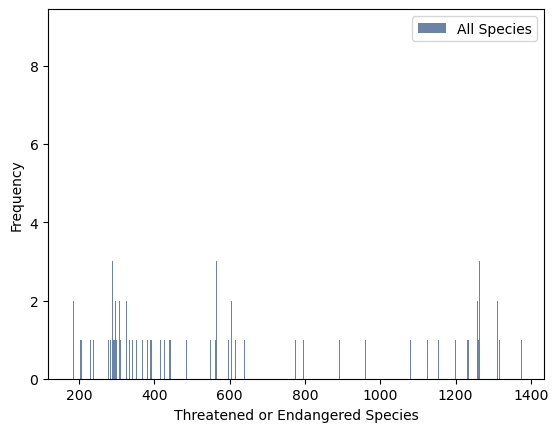

<Figure size 800x600 with 0 Axes>

In [7]:
# histogram for "all_all"

hist_all_all = thinkstats2.Hist(endangered_df.all_all, label = 'All Species')
thinkplot.Hist(hist_all_all)
thinkplot.Show(xlabel = 'Threatened or Endangered Species', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values. 

In [28]:
# smallest values for all species

for all_all, freq in hist_all_all.Smallest(5):
    print(all_all, freq)

178 4
181 1
183 4
185 2
186 1


In [29]:
# largest values for all species

for all_all, freq in hist_all_all.Largest(5):
    print(all_all, freq)

1375 1
1368 1
1358 1
1353 1
1352 1


#### All Mammals

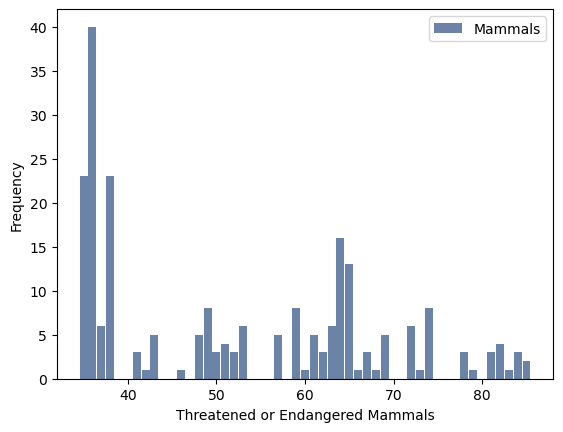

<Figure size 800x600 with 0 Axes>

In [10]:
# histogram for "all_m" 

hist_all_m = thinkstats2.Hist(endangered_df.all_m, label = 'Mammals')
thinkplot.Hist(hist_all_m)
thinkplot.Show(xlabel = 'Threatened or Endangered Mammals', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values. 

In [30]:
# smallest values for all mammals

for all_m, freq in hist_all_m.Smallest(5):
    print(all_m, freq)

35 23
36 40
37 6
38 23
41 3


In [31]:
# largest values for all mammals

for all_m, freq in hist_all_m.Largest(5):
    print(all_m, freq)

85 2
84 3
83 1
82 4
81 3


#### All Birds

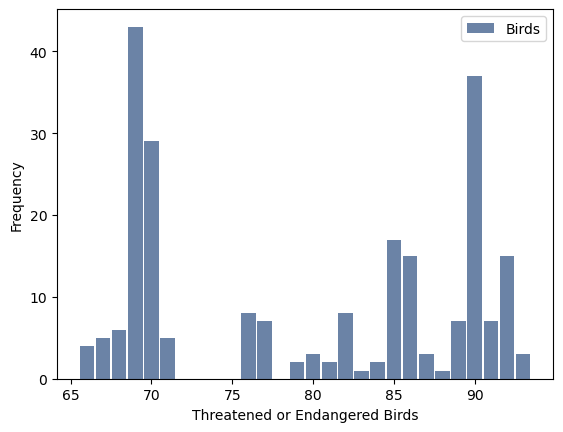

<Figure size 800x600 with 0 Axes>

In [14]:
# histogram for "all_b"

hist_all_b = thinkstats2.Hist(endangered_df.all_b, label = 'Birds')
thinkplot.Hist(hist_all_b)
thinkplot.Show(xlabel = 'Threatened or Endangered Birds', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values. 

In [32]:
# smallest values for birds

for all_b, freq in hist_all_b.Smallest(5):
    print(all_b, freq)

66 4
67 5
68 6
69 43
70 29


In [33]:
# largest values for birds

for all_b, freq in hist_all_b.Largest(5):
    print(all_b, freq)

93 3
92 15
91 7
90 37
89 7


#### All Reptiles

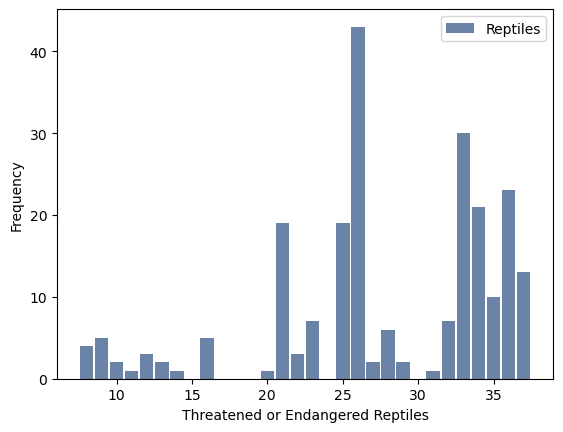

<Figure size 800x600 with 0 Axes>

In [17]:
# histogram for "all_r"

hist_all_r = thinkstats2.Hist(endangered_df.all_r, label = 'Reptiles')
thinkplot.Hist(hist_all_r)
thinkplot.Show(xlabel = 'Threatened or Endangered Reptiles', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values. 

In [34]:
# smallest values for reptiles

for all_r, freq in hist_all_r.Smallest(5):
    print(all_r, freq)

8 4
9 5
10 2
11 1
12 3


In [35]:
# largest values for reptiles

for all_r, freq in hist_all_r.Largest(5):
    print(all_r, freq)

37 13
36 23
35 10
34 21
33 30


#### All Amphibians

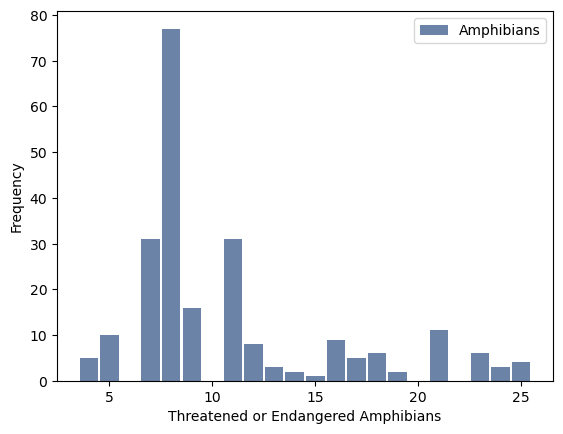

<Figure size 800x600 with 0 Axes>

In [20]:
# histogram for "all_am"

hist_all_am = thinkstats2.Hist(endangered_df.all_am, label = 'Amphibians')
thinkplot.Hist(hist_all_am)
thinkplot.Show(xlabel = 'Threatened or Endangered Amphibians', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values.

In [36]:
# smallest values for amphibians

for all_am, freq in hist_all_am.Smallest(5):
    print(all_am, freq)

4 5
5 10
7 31
8 77
9 16


In [37]:
# largest values for amphibians

for all_am, freq in hist_all_am.Largest(5):
    print(all_am, freq)

25 4
24 3
23 6
21 11
19 2


#### All Fish

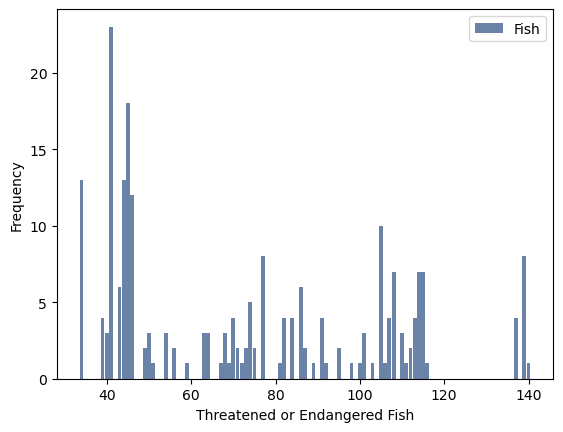

<Figure size 800x600 with 0 Axes>

In [23]:
# histogram for "all_f"

hist_all_f = thinkstats2.Hist(endangered_df.all_f, label = 'Fish')
thinkplot.Hist(hist_all_f)
thinkplot.Show(xlabel = 'Threatened or Endangered Fish', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values.

In [38]:
# smallest values for fish

for all_f, freq in hist_all_f.Smallest(5):
    print(all_f, freq)

34 13
39 4
40 3
41 23
43 6


In [39]:
# largest values for fish

for all_f, freq in hist_all_f.Largest(5):
    print(all_f, freq)

140 1
139 8
137 4
116 1
115 7


#### All Plants

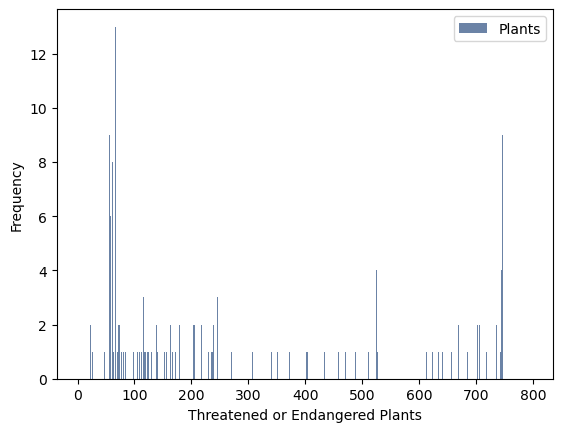

<Figure size 800x600 with 0 Axes>

In [26]:
# histogram for "all_p"

hist_all_p = thinkstats2.Hist(endangered_df.all_p, label = 'Plants')
thinkplot.Hist(hist_all_p)
thinkplot.Show(xlabel = 'Threatened or Endangered Plants', ylabel = 'Frequency')

#### Look for outliers by separating the smallest and largest values.

In [40]:
# smallest values for plants

for all_p, freq in hist_all_p.Smallest(5):
    print(all_p, freq)

4.0 8
17.0 5
22.0 6
23.0 2
24.0 1


In [41]:
# largest values for plants

for all_p, freq in hist_all_p.Largest(5):
    print(all_p, freq)

795.0 1
793.0 1
746.0 9
745.0 4
744.0 9


### Summary and Analysis

#### I separated the smallest and largest values for each of the chosen variables in order to determine potential outliers. Due to the nature of this project, while there are some outlying values, I will be keeping them all as they are important for the overall picture. These show how, over time, certain species have become more or less endangered/threatened. 

#### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

#### Descriptive Statistics - All Species

In [65]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_all.mean())
print('Mode:', endangered_df.all_all.mode().values)
print('Range:', (endangered_df.all_all.max() -  endangered_df.all_all.min()))
print('Variance:', endangered_df.all_all.var())
print('Standard Deviation:', endangered_df.all_all.std())
print('25%:', endangered_df.all_all.quantile([0.25]).values)
print('50%:', endangered_df.all_all.quantile([0.5]).values)
print('75%:', endangered_df.all_all.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_all.describe())

Mean: 592.3478260869565
Mode: [284]
Range: 1197
Variance: 151995.38940573382
Standard Deviation: 389.86586078513443
25%: [284.75]
50%: [420.5]
75%: [959.]


#### Descriptive Statistics - All Mammals

In [66]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_m.mean())
print('Mode:', endangered_df.all_m.mode().values)
print('Range:', (endangered_df.all_m.max() -  endangered_df.all_m.min()))
print('Variance:', endangered_df.all_m.var())
print('Standard Deviation:', endangered_df.all_m.std())
print('25%:', endangered_df.all_m.quantile([0.25]).values)
print('50%:', endangered_df.all_m.quantile([0.5]).values)
print('75%:', endangered_df.all_m.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_m.describe())

Mean: 51.947826086956525
Mode: [36]
Range: 50
Variance: 238.9142965635086
Standard Deviation: 15.45685273797705
25%: [36.]
50%: [49.5]
75%: [64.]


#### Descriptive Statistics - All Birds

In [67]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_b.mean())
print('Mode:', endangered_df.all_b.mode().values)
print('Range:', (endangered_df.all_b.max() -  endangered_df.all_b.min()))
print('Variance:', endangered_df.all_b.var())
print('Standard Deviation:', endangered_df.all_b.std())
print('25%:', endangered_df.all_b.quantile([0.25]).values)
print('50%:', endangered_df.all_b.quantile([0.5]).values)
print('75%:', endangered_df.all_b.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_b.describe())

Mean: 79.59130434782608
Mode: [69]
Range: 27
Variance: 88.15538257072342
Standard Deviation: 9.389109785848891
25%: [69.25]
50%: [82.]
75%: [90.]


#### Descriptive Statistics - All Reptiles

In [68]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_r.mean())
print('Mode:', endangered_df.all_r.mode().values)
print('Range:', (endangered_df.all_r.max() -  endangered_df.all_r.min()))
print('Variance:', endangered_df.all_r.var())
print('Standard Deviation:', endangered_df.all_r.std())
print('25%:', endangered_df.all_r.quantile([0.25]).values)
print('50%:', endangered_df.all_r.quantile([0.5]).values)
print('75%:', endangered_df.all_r.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_r.describe())

Mean: 27.830434782608695
Mode: [26]
Range: 29
Variance: 55.61741029048798
Standard Deviation: 7.457708112449024
25%: [25.]
50%: [26.5]
75%: [34.]


#### Descriptive Statistics - All Amphibians

In [69]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_am.mean())
print('Mode:', endangered_df.all_am.mode().values)
print('Range:', (endangered_df.all_am.max() -  endangered_df.all_am.min()))
print('Variance:', endangered_df.all_am.var())
print('Standard Deviation:', endangered_df.all_am.std())
print('25%:', endangered_df.all_am.quantile([0.25]).values)
print('50%:', endangered_df.all_am.quantile([0.5]).values)
print('75%:', endangered_df.all_am.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_am.describe())

Mean: 10.791304347826086
Mode: [8]
Range: 21
Variance: 26.130928422251763
Standard Deviation: 5.111841979389793
25%: [8.]
50%: [8.]
75%: [12.]


#### Descriptive Statistics - All Fish

In [70]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_f.mean())
print('Mode:', endangered_df.all_f.mode().values)
print('Range:', (endangered_df.all_f.max() -  endangered_df.all_f.min()))
print('Variance:', endangered_df.all_f.var())
print('Standard Deviation:', endangered_df.all_f.std())
print('25%:', endangered_df.all_f.quantile([0.25]).values)
print('50%:', endangered_df.all_f.quantile([0.5]).values)
print('75%:', endangered_df.all_f.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_f.describe())

Mean: 72.74782608695652
Mode: [41]
Range: 106
Variance: 992.5824188342514
Standard Deviation: 31.50527604758053
25%: [44.]
50%: [69.5]
75%: [105.]


#### Descriptive Statistics - All Plants

In [71]:
# descriptive stats split up and cleaned up

print('Mean:', endangered_df.all_p.mean())
print('Mode:', endangered_df.all_p.mode().values)
print('Range:', (endangered_df.all_p.max() -  endangered_df.all_p.min()))
print('Variance:', endangered_df.all_p.var())
print('Standard Deviation:', endangered_df.all_p.std())
print('25%:', endangered_df.all_p.quantile([0.25]).values)
print('50%:', endangered_df.all_p.quantile([0.5]).values)
print('75%:', endangered_df.all_p.quantile([0.75]).values)


# summary print out could also have been used

# print('Summary:', endangered_df.all_p.describe())

Mean: 281.11467889908255
Mode: [67.]
Range: 791.0
Variance: 73539.41996786882
Standard Deviation: 271.1815258602046
25%: [62.]
50%: [155.]
75%: [525.75]


#### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [72]:
endangered_pmf = thinkstats2.Pmf(endangered_df.end_m, label = "endangered")
threatened_pmf = thinkstats2.Pmf(endangered_df.thrt_m, label = "threatened")

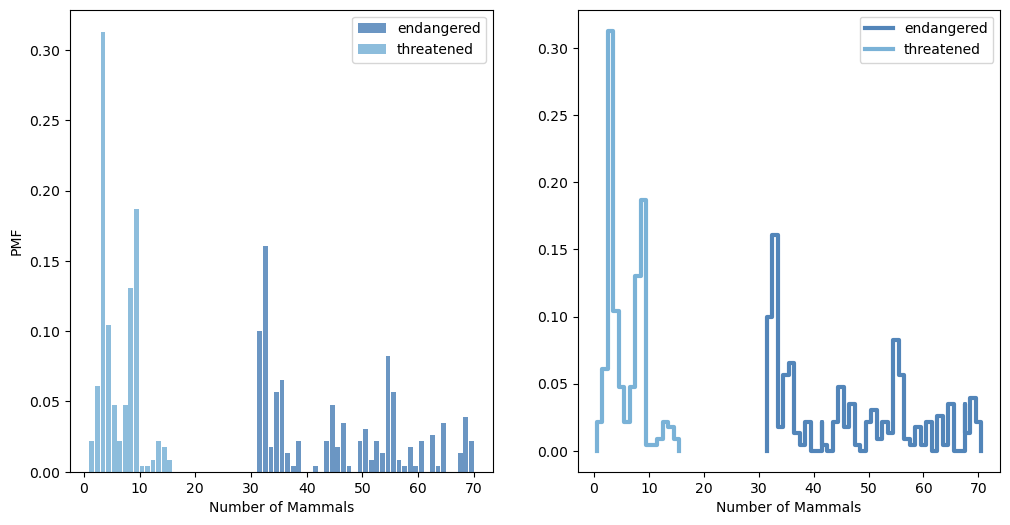

In [84]:
width = 0.85
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(endangered_pmf, align = "right", width = width)
thinkplot.Hist(threatened_pmf, align = "left", width = width)
thinkplot.Config(xlabel = "Number of Mammals", ylabel = "PMF")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([endangered_pmf, threatened_pmf])
thinkplot.Config(xlabel = "Number of Mammals")

#### The PMF compares mammals which are endangered to those who are only threatened as both a bar graph and a step function.

#### Both of the graphs show that there is a greater number of mammals between the years 1976 and 2010 that are endangered as opposed to being only threatened.

#### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

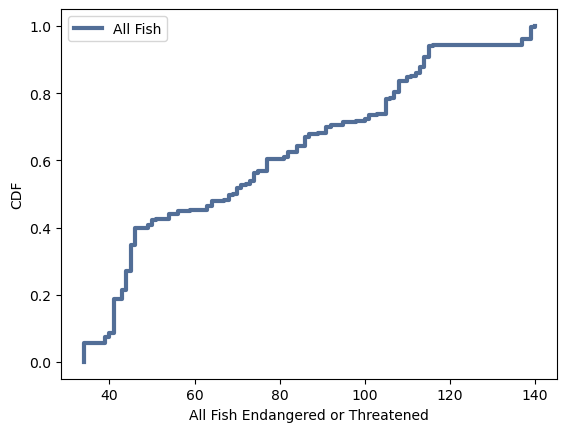

In [89]:
# CDF for all fish variable

all_f_cdf = thinkstats2.Cdf(endangered_df.all_f, label = 'All Fish')
thinkplot.Cdf(all_f_cdf)
thinkplot.Config(xlabel = 'All Fish Endangered or Threatened', ylabel = 'CDF', loc = 'upper left')

#### Over the years, less than 10% of the assessments were below 40 fish endangered or threatened. On the other hand, about 75% of the assessments, showed 100+ fish which were endangered or threatened.

#### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

Mean: 51.947826086956525
Var: 237.8755387523629
Sigma: 15.423214280828848


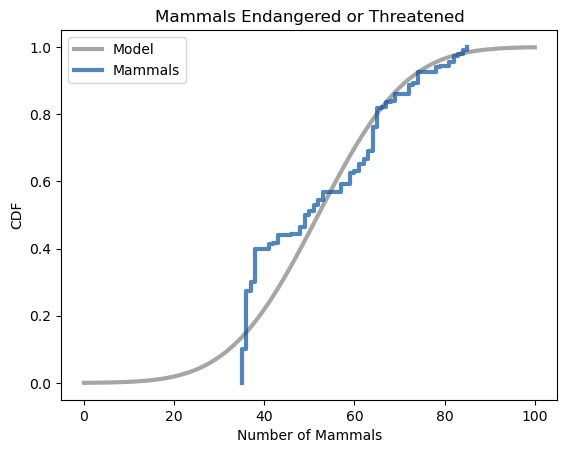

In [97]:
mammals = endangered_df.all_m

# estimate mean and variance

mu, var = thinkstats2.MeanVar(mammals)
print('Mean:', mu)
print('Var:', var)
    
# plot model

sigma = np.sqrt(var)
print('Sigma:', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low = 0, high = 100)

thinkplot.Plot(xs, ps, label = 'Model', color = 'grey')

# plot mammals data

cdf = thinkstats2.Cdf(mammals, label = 'Mammals')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title = 'Mammals Endangered or Threatened',
                 xlabel = 'Number of Mammals',
                 ylabel = 'CDF')

#### The curves in the all mammals data deviate from the normal curve of the expected model. The most common values (35-38) occupy the first 40th percentile rank. The curves seem to become closer to one another in the upper part of the graph 75th percentle to 95th. 

#### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

#### Scatterplots: 

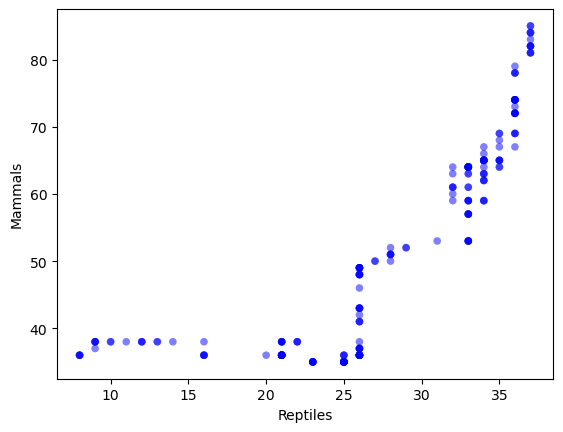

<Figure size 800x600 with 0 Axes>

In [124]:
# comparison of reptiles and mammals

thinkplot.Scatter(endangered_df.all_r, endangered_df.all_m, alpha = 0.5)
thinkplot.Config(xlabel = 'Reptiles',
                 ylabel = 'Mammals',
                 legend = True)

thinkplot.show()

#### This scatterplot suggests a mostly positive correlation between the number of endangered/threatened mammals and the number of endangered/threatened plants. 

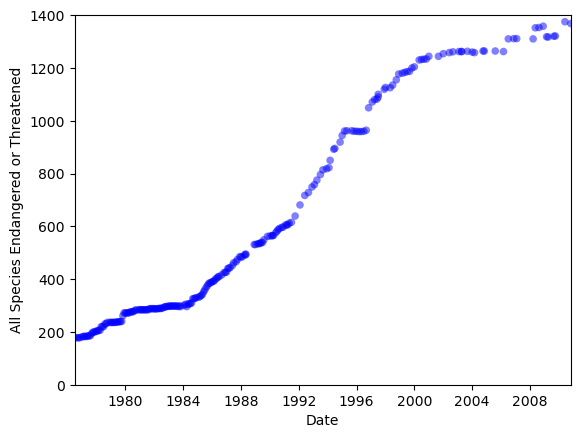

<Figure size 800x600 with 0 Axes>

In [107]:
thinkplot.Scatter(endangered_df.index, endangered_df.all_all, alpha=0.5)
thinkplot.Config(xlabel='Date',
                 ylabel='All Species Endangered or Threatened',
                 axis=[endangered_df.index[0], endangered_df.index[-1], 0, 1400],
                 legend=False)

thinkplot.show()

#### This scatterplot suggests that there is a positive correlation between the number of species classified as either endangered or threatened and time.

#### Covariance: 

In [109]:
def Cov(xs, ys, meanx = None, meany = None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs - meanx, ys - meany) / len(xs)
    return cov

In [123]:
# All Reptiles vs. Mammals - Covariance

Cov(endangered_df.all_r, endangered_df.all_m)

95.25202268431003

In [116]:
# Creating new column for date index values

endangered_df['date_values'] = endangered_df.index.values

dates = endangered_df.date_values

# Converting date column to integer

dates_int = dates.dt.strftime("%Y%m%d").astype(int)

# Date vs. All Species - Covariance

Cov(dates_int, endangered_df.all_all)

34182461.20378071

#### Both the covariance for Mammals vs. Plants and that for Dates vs. All Species returned a positive relationship. 

#### Pearson's Correlation

In [117]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [122]:
# Reptiles vs. Mammals

Corr(endangered_df.all_r, endangered_df.all_m)

0.8299274125970323

In [125]:
# Date vs. All Species

Corr(dates_int, endangered_df.all_all)

0.9769299662487161

#### It appears that there is a strong positive correlation between dates and the number of species endangered or threatened, as well as between the number of reptiles either endangered/threatened and the number of mammals either endangered/threatened. 

#### Non-Linear Relationships

In [126]:
# convert variables for reptiles and mammals and check corr

Corr(np.log(endangered_df.all_r), np.log(endangered_df.all_m))

0.7152023750007471

In [127]:
# convert variables for date and all species and check corr

Corr(np.log(dates_int), np.log(endangered_df.all_all))

0.9754341294652449

#### Upon converting to account for non-linear relationships, there is still a correlation for both comparisons.  

#### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

#### Hypothesis Testing - Null Hypothesis: No correlation between the number of endangered/threatened birds and the number of endangered/threatened mammals.

In [132]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [150]:
# create subset

cleaned = endangered_df.dropna(subset=['all_b', 'all_m'])
corr_data = cleaned.all_b, cleaned.all_m

# correlation on subset

corr_test = CorrelationPermute(corr_data)
pvalue = corr_test.PValue()

print ('p-value: ', pvalue)

p-value:  0.0


#### The p-value is 0, which tells us that there wasn't a correlation more significant than the null hypothesis.

#### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11)

In [140]:
import statsmodels.formula.api as smf

In [147]:
# all mammals as function of all species

formula = 'all_m ~ all_all'
model = smf.ols(formula, data = endangered_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  all_m   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2091.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          7.85e-117
Time:                        18:24:55   Log-Likelihood:                -688.84
No. Observations:                 230   AIC:                             1382.
Df Residuals:                     228   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6473      0.583     50.820      0.000      28.498      30.797
all_all        0.0376      0.001     45.733      0.000       0.036       0.039
==============================================================================
Omnibus:                       41.088   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.338
Skew:                           0.442   Prob(JB):                     0.000283
Kurtosis:                       2.039   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
inter = results.params['Intercept']
slope = results.params['all_all']
slope_pvalue = results.pvalues['all_all']
print('Intercept:', inter)
print('Slope:', slope)
print('p-value of slope estimate:', slope_pvalue)
print('R^2:', results.rsquared)

Intercept: 29.647347603485983
Slope: 0.03764760753962293
p-value of slope estimate: 7.849550924033315e-117
R^2: 0.9017020163033321


#### Overall, with high R^2 values, the regression results support strong correlation and predictive power.